In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#CountVectorizer + tfiidTransformer = tfidVectorizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from ipywidgets import interact

import markovify
import string
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikdu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikdu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikdu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [3]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
from sklearn.metrics import classification_report

In [4]:
df=pd.read_csv('skindataall.csv',index_col=[0])

In [5]:
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [6]:
df.describe()

,Rating_Stars,Price,Rating,Combination,Dry,Normal,Oily,Sensitive,User_id,Product_id,Good_Stuff
count,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000
mean,4.101861,47.289860,4.290982,0.661579,0.567927,0.636952,0.617644,0.515320,3429.434732,155.091224,0.619262
std,1.362036,35.774619,0.470872,0.473200,0.495393,0.480906,0.485991,0.499794,1987.197060,91.736755,0.485596
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,28.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1696.000000,73.000000,0.000000
50%,5.000000,38.000000,4.400000,1.000000,1.000000,1.000000,1.000000,1.000000,3437.000000,155.000000,1.000000
75%,5.000000,58.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,5158.000000,236.000000,1.000000
max,5.000000,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6890.000000,314.000000,1.000000


EDA and Data Visualization

<AxesSubplot:xlabel='Skin_Tone'>

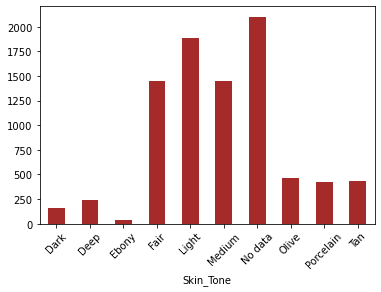

In [7]:
skintone_stats=df.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color='brown',rot=45)

<AxesSubplot:xlabel='Skin_Type'>

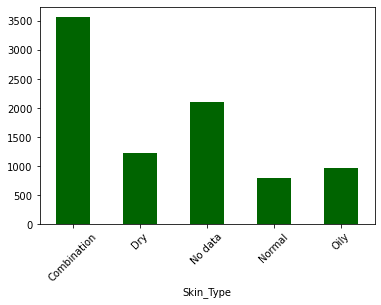

In [8]:
skintone_stats=df.groupby('Skin_Type')['Username'].count()
skintone_stats.plot.bar(color='darkgreen',rot=45)

<AxesSubplot:xlabel='Eye_Color'>

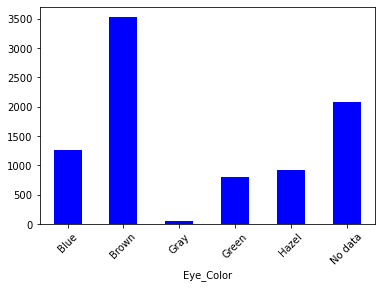

In [9]:
eyecolor_stats=df.groupby('Eye_Color')['Username'].count()
eyecolor_stats.plot.bar(color='blue',rot=45)

<AxesSubplot:xlabel='Hair_Color'>

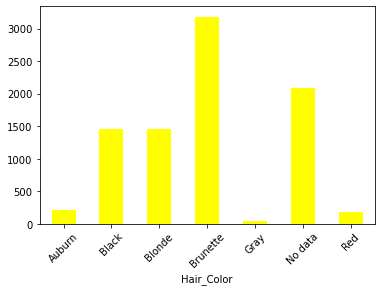

In [10]:
haircolor_stats=df.groupby('Hair_Color')['Username'].count()
haircolor_stats.plot.bar(color='yellow',rot=45)

<AxesSubplot:xlabel='Rating_Stars'>

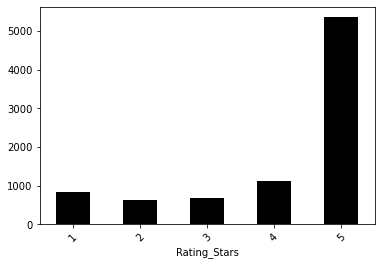

In [11]:
rating_stats=df.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color='black',rot=45)

In [12]:
import markovify
import string

In [13]:
def no_punc(string):
    no_punc_string=re.sub('[^\w\s]','',string)
    return no_punc_string

In [14]:
df['Review']=df.apply(lambda row: no_punc(row['Review']),axis=1)

In [15]:
df['Review'].head()

0    This is hands down the best cleanser Ive ever ...
1    Unfortunately this doesnt work for everyone I ...
2    My favorite cleanser i love the packaging on t...
3    I love all things Youth To The People This cle...
4    I had a trial size of this and was obsessed My...
Name: Review, dtype: object

In [16]:
text_model=markovify.NewlineText(df.Review,state_size=2)

In [19]:
for i in range(10):
    print(text_model.make_sentence(),'\n')

Ive been using it every day I keep this one for me is great It does what it says everyday which I really didnt even help and my skin after using this Buy it you will not be finishing the jar 

My favorite thing about this wipe is my favorite but works wonderfully to take off dirt oil and doesnt last long I use this at night my face clean and feels very refreshing 

I received a free sample I received it free in a week its clearing my skin The small bottle can create some dryness However it left his skin his wrinkles have become very obvious I do get that feeling And it took a lot on the skin on the nose area where I get all the sweat and make a difference in my skincare routine at once Im done using this product helped with the empty bottle to finally find something that firmed it up quickly 

i have used them every day Doesnt overly dry after washing it 

I have tried many other wipes from drying out my combination oily dry and oily skin 

Love this toner has a weird film on my should

In [17]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

In [18]:
negativedf=df[df.Rating_Stars<=4]

In [19]:
positivedf=df[df.Rating_Stars>4]

In [20]:
positivedf.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser Ive ever ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser i love the packaging on t...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People This cle...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed My...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
7,jenn887,Tan,Dry,Brown,Black,5,loveeeeeee this cleanser Leaves my skin smooth...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4742,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['loveeeeeee', 'cleanser', 'leaf', 'skin', 'sm...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [21]:
negative=" ".join(review for review in negativedf.Review)

In [22]:
negative

'Unfortunately this doesnt work for everyone I used it once and woke up the nxt day with 5 pimples used it again and again and again but woke up with more and more Finally i couldnt take it anymore I stopped using it went back to my cerave hydrating cleanser and Bam My skin was clearing up every day after that I suggest getting the small bottle to try it out first Remember everyones skin is very different\nread more There is nothing great about this cleanser I got the small size bottle to try out and would certainly never spend my money to buy this It did remove my makeup so this got 2 stars instead of one but it did nothing for my skin In fact I had some uneven texture after using this for a while There are much better cleansers out there Been trying this cleanser for about 3 weeks now and its not for me Im so glad I only bought the small bottle as this product broke me out Its the only new product in my routine so I know it is this one causing the break outs I also just didnt feel as

In [23]:
positive=" ".join(review for review in positivedf.Review)

In [24]:
positive

'This is hands down the best cleanser Ive ever used I originally got it in the mini bottle at checkout on a whim and was shocked by how much it cleared my skin up I bought the big bottle and havent looked back since now this is the only cleanser Ill use I used to get little pimples all over my forehead and ever since I started using this a year ago they went away and havent returned While I cant speak for everyones skin this was a miracle product for clearing my complexion and soothes my facial redness each time I use it Im in love\nread more My favorite cleanser i love the packaging on this even tho my first bottle slipped out of my hands lol I love all things Youth To The People This cleanser smells fresh and light the ingredients are fantastic and they are crueltyfree A quick google search of any brand will tell you if theyre actually crueltyfree dont just trust what a company says on its site there are very loose rules about a company being able to claim theyre CF on their marketin

In [25]:
stopwords=set(STOPWORDS)

In [26]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [27]:
stopwords.update(['read','more','product'])

In [28]:
len(set(STOPWORDS))

192

In [29]:
len(stopwords)

194

In [30]:
def generate_wordcloud(data):
    wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(data)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

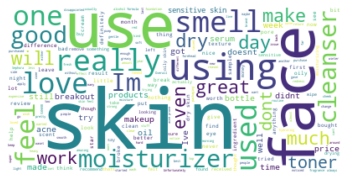

In [31]:
generate_wordcloud(negative)

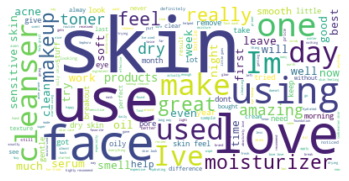

In [32]:
generate_wordcloud(positive)

In [33]:
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser Ive ever ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesnt work for everyone I ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser i love the packaging on t...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People This cle...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed My...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [34]:
df['Category'].value_counts()

Cleanser       4117
Moisturizer    2560
Treatment      1948
Face Mask        24
Name: Category, dtype: int64

In [35]:
moist_df=df[df.Category=='Moisturizer']

In [36]:
treatment_df=df[df.Category=='Treatment']

In [37]:
facemask_df=df[df.Category=='Face Mask']

In [38]:
cleanser_df=df[df.Category=='Cleanser']

In [39]:
moist=" ".join(ing for ing in moist_df.Ingredients)

In [40]:
treatment=" ".join(ing for ing in treatment_df.Ingredients)

In [41]:
cleanse=" ".join(ing for ing in cleanser_df.Ingredients)

In [42]:
mask=" ".join(ing for ing in facemask_df.Ingredients)

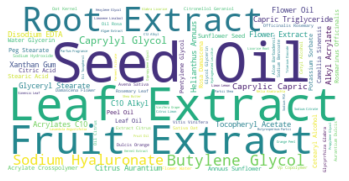

In [43]:
generate_wordcloud(moist)

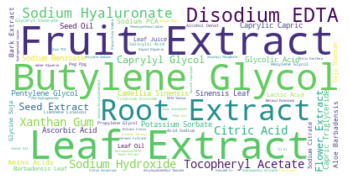

In [44]:
generate_wordcloud(treatment)

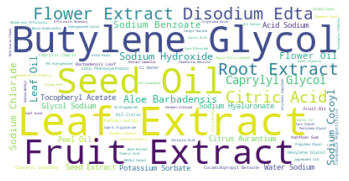

In [45]:
generate_wordcloud(cleanse)

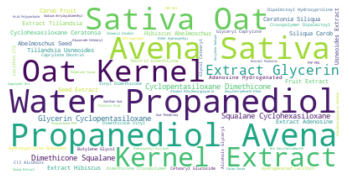

In [46]:
generate_wordcloud(mask)

In [47]:
x=df.Ingredients
y=df.Category

In [48]:
 xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [49]:
categories=['Moisturizers','Cleanser','Treatment','Face Mask']

In [50]:
nb=Pipeline([('vect',CountVectorizer()),('tfid',TfidfTransformer()),('clf',MultinomialNB())])

In [51]:
nb.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [52]:
y_pred=nb.predict(xtest)

In [53]:
print('accuracy %s' %accuracy_score(y_pred,ytest))

accuracy 0.9653259361997226


In [54]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

Moisturizers       0.96      0.99      0.98      1031
    Cleanser       0.00      0.00      0.00         9
   Treatment       0.99      0.96      0.98       649
   Face Mask       0.94      0.92      0.93       474

    accuracy                           0.97      2163
   macro avg       0.72      0.72      0.72      2163
weighted avg       0.96      0.97      0.96      2163



In [55]:
logreg=Pipeline([('vect',CountVectorizer()),('tfid', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1,C=1e5))])

In [56]:
logreg.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [57]:
y_pred=logreg.predict(xtest)

In [58]:
print('Accuracy %s'%accuracy_score(y_pred,ytest))

Accuracy 0.9833564493758669


In [59]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

Moisturizers       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Treatment       0.97      1.00      0.98       649
   Face Mask       0.98      0.99      0.98       474

    accuracy                           0.98      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.98      0.98      0.98      2163



In [60]:
sgd=Pipeline([('vect',CountVectorizer()),('tfid', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge',penalty='l2',alpha=1e-3,random_state=42,max_iter=5))])

In [61]:
sgd.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42))])

In [62]:
y_pred=sgd.predict(xtest)

In [63]:
print('Accuracy %s'%accuracy_score(y_pred,ytest))

Accuracy 0.9754969949144706


In [64]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

Moisturizers       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Treatment       0.96      1.00      0.98       649
   Face Mask       0.97      0.96      0.96       474

    accuracy                           0.98      2163
   macro avg       0.98      0.98      0.98      2163
weighted avg       0.98      0.98      0.98      2163



In [65]:
x1=df.Ingredients
y1=df.Good_Stuff

In [66]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=25,random_state=42)

In [67]:
cat=['1','0']

In [68]:
nb=Pipeline([('vect',CountVectorizer()),('tfid',TfidfTransformer()),('clf',MultinomialNB())])

In [69]:
nb.fit(xtrain1,ytrain1)
y_pred1=nb.predict(xtest1)
print('Accuracy %s'%accuracy_score(y_pred1,ytest1))
print(classification_report(ytest1,y_pred1,target_names=cat))

Accuracy 0.64
              precision    recall  f1-score   support

           1       0.50      0.22      0.31         9
           0       0.67      0.88      0.76        16

    accuracy                           0.64        25
   macro avg       0.58      0.55      0.53        25
weighted avg       0.61      0.64      0.60        25



In [70]:
logreg=Pipeline([('vect',CountVectorizer()),('tfid', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1,C=1e5))])
logreg.fit(xtrain1,ytrain1)
y_pred1=logreg.predict(xtest1)
print('Accuracy %s'%accuracy_score(y_pred1,ytest1))
print(classification_report(ytest1,y_pred1,target_names=cat))

Accuracy 0.68
              precision    recall  f1-score   support

           1       0.60      0.33      0.43         9
           0       0.70      0.88      0.78        16

    accuracy                           0.68        25
   macro avg       0.65      0.60      0.60        25
weighted avg       0.66      0.68      0.65        25



In [71]:
sgd=Pipeline([('vect',CountVectorizer()),('tfid', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge',penalty='l2',alpha=1e-3,random_state=42,max_iter=5))])
sgd.fit(xtrain1,ytrain1)
y_pred1=sgd.predict(xtest1)
print('Accuracy %s'%accuracy_score(y_pred1,ytest1))
print(classification_report(ytest1,y_pred1,target_names=cat))

Accuracy 0.64
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           0       0.64      1.00      0.78        16

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



In [75]:
def recomend_products_by_user_feature(skintone,eyecolor, skintype, haircolor):
    dff=df[(df['Skin_Tone']==skintone) & (df['Eye_Color']==eyecolor) & (df['Skin_Type']==skintone) & (df['Hair_Color']==haircolor)]
    recommendations=dff[(dff['Rating_Stars'].notnull())][['Rating_Stars','Product_Url','Product']]
    recommendations=recommendations.sort_values('Rating_Stars', ascending=False).head(10)
    print('Based on your features, these are the top product for you')
    return recommendations

In [76]:
skintone=str(input('Enter skin tone'))
eyecolor=str(input('Enter eye tone'))
skintype=str(input('Enter skin type'))
haircolor=str(input('Enter hair color'))

Enter skin toneLight
Enter eye toneGreen
Enter skin typeCombination
Enter hair colorBrunette


In [101]:
recomend_products_by_user_feature(skintone,eyecolor, skintype, haircolor)

Based on your features, these are the top product for you


,Rating_Stars,Product_Url,Product


In [80]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

In [82]:
df_cont=df[['Product','Product_id','Ingredients','Product_Url','Ing_Tfidf','Rating']]

In [83]:
df_cont.head()

,Product,Product_id,Ingredients,Product_Url,Ing_Tfidf,Rating
0,Superfood Antioxidant Cleanser,157,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",https://www.sephora.com/product/kale-spinach-g...,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4
1,Superfood Antioxidant Cleanser,157,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",https://www.sephora.com/product/kale-spinach-g...,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4
2,Superfood Antioxidant Cleanser,157,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",https://www.sephora.com/product/kale-spinach-g...,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4
3,Superfood Antioxidant Cleanser,157,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",https://www.sephora.com/product/kale-spinach-g...,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4
4,Superfood Antioxidant Cleanser,157,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",https://www.sephora.com/product/kale-spinach-g...,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4


In [84]:
df_cont.drop_duplicates(inplace=True)

In [85]:
tf=TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')

In [87]:
tfidf_matrix=tf.fit_transform(df_cont['Ingredients'])

In [88]:
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [89]:
df_cont.head()

,Product,Product_id,Ingredients,Product_Url,Ing_Tfidf,Rating
0,Superfood Antioxidant Cleanser,157,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",https://www.sephora.com/product/kale-spinach-g...,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4
48,Cleansing & Exfoliating Wipes,65,"Water, Caprylic/Capric Triglyceride, Fragrance...",https://www.sephora.com/product/cleansing-exfo...,"caprylic, capric, triglyceride, fragrance, phe...",4.5
96,Purity Made Simple Cleanser,210,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",https://www.sephora.com/product/purity-made-si...,"sodium, lauroamphoacetate, sodium, trideceth, ...",4.5
144,Beste™ No. 9 Jelly Cleanser,35,"Water, Sodium Lauroyl Methyl Isethionate, Glyc...",https://www.sephora.com/product/beste-no-9-jel...,"sodium, lauroyl, methyl, isethionate, glycerin...",4.1
192,The Rice Polish Foaming Enzyme Powder,196,"Microcrystalline Cellulose, Oryza Sativa (Rice...",https://www.sephora.com/product/polished-rice-...,"microcrystalline, cellulose, oryza, sativa, ri...",4.4


In [90]:
df_cont.reset_index(drop=True)

,Product,Product_id,Ingredients,Product_Url,Ing_Tfidf,Rating
0,Superfood Antioxidant Cleanser,157,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",https://www.sephora.com/product/kale-spinach-g...,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4
1,Cleansing & Exfoliating Wipes,65,"Water, Caprylic/Capric Triglyceride, Fragrance...",https://www.sephora.com/product/cleansing-exfo...,"caprylic, capric, triglyceride, fragrance, phe...",4.5
2,Purity Made Simple Cleanser,210,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",https://www.sephora.com/product/purity-made-si...,"sodium, lauroamphoacetate, sodium, trideceth, ...",4.5
3,Beste™ No. 9 Jelly Cleanser,35,"Water, Sodium Lauroyl Methyl Isethionate, Glyc...",https://www.sephora.com/product/beste-no-9-jel...,"sodium, lauroyl, methyl, isethionate, glycerin...",4.1
4,The Rice Polish Foaming Enzyme Powder,196,"Microcrystalline Cellulose, Oryza Sativa (Rice...",https://www.sephora.com/product/polished-rice-...,"microcrystalline, cellulose, oryza, sativa, ri...",4.4
...,...,...,...,...,...,...
310,Midnight Secret Late Night Recovery Treatment,173,Visit the Guerlain boutique,https://www.sephora.com/product/midnight-secre...,"visit, guerlain, boutique",4.2
311,Post-Acne Spot Lightening Gel,198,"Water, Alcohol Denat., Glycolic Acid, Butylene...",https://www.sephora.com/product/post-acne-spot...,"alcohol, denat, glycolic, acid, butylene, glyc...",3.7
312,Hydro-Plumping Re-Texturizing Serum Concentrate,150,"Water, Glycerin, Dimethicone, Propanediol, Dim...",https://www.sephora.com/product/hydro-plumping...,"glycerin, dimethicone, propanediol, dimethicon...",4.7
313,The Microdelivery Resurfacing Peel,266,"The Microdelivery Peel Step I:\r\r\nPeg-6, Sod...",https://www.sephora.com/product/the-microdeliv...,"microdelivery, peel, step, peg, sodium, bicarb...",4.7


In [91]:
titles=df_cont[['Product','Ing_Tfidf','Rating']]

In [92]:
titles.head()

,Product,Ing_Tfidf,Rating
0,Superfood Antioxidant Cleanser,"sodium, cocoyl, glutamate, cocamidopropyl, bet...",4.4
48,Cleansing & Exfoliating Wipes,"caprylic, capric, triglyceride, fragrance, phe...",4.5
96,Purity Made Simple Cleanser,"sodium, lauroamphoacetate, sodium, trideceth, ...",4.5
144,Beste™ No. 9 Jelly Cleanser,"sodium, lauroyl, methyl, isethionate, glycerin...",4.1
192,The Rice Polish Foaming Enzyme Powder,"microcrystalline, cellulose, oryza, sativa, ri...",4.4


In [94]:
indices=pd.Series(df_cont.index,index=df_cont['Product'])

In [95]:
indices

Product
Superfood Antioxidant Cleanser                           0
Cleansing & Exfoliating Wipes                           48
Purity Made Simple Cleanser                             96
Beste™ No. 9 Jelly Cleanser                            144
The Rice Polish Foaming Enzyme Powder                  192
                                                      ... 
Midnight Secret Late Night Recovery Treatment         8583
Post-Acne Spot Lightening Gel                         8607
Hydro-Plumping Re-Texturizing Serum Concentrate       8631
The Microdelivery Resurfacing Peel                    8655
Ferulic + Retinol Wrinkle Recovery Overnight Serum    8679
Length: 315, dtype: int64

In [99]:
def content_recommendation(product):
    idx=indices[product]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:11]
    product_indices=[i[0] for i in sim_scores]
    return titles.iloc[product_indices]    

In [100]:
content_recommendation('The Rice Polish Foaming Enzyme Powder')

,Product,Ing_Tfidf,Rating
8012,Water Drench Hyaluronic Cloud Serum,"saccharide, isomerate, sodium, hyaluronate, so...",4.2
1440,Water Drench Hyaluronic Cloud Cream,"glycerin, cyclopentasiloxane, dipropylene, gly...",4.4
2040,Nutrient-Charged Water Gel,"dimethicone, glycerin, propanediol, saccharide...",4.6
5616,Problem Solution Toner,"dipropylene, glycol, butylene, glycol, hexaned...",4.3
1080,The True Cream Moisturizing Bomb,"glycerin, cyclohexasiloxane, hydrogenated, pol...",4.6
6764,Skin Rescue Acne Clearing Pads with White Clay,"polysorbate, phenoxyethanol, sodium, hydroxide...",4.2
4536,Deep Cleansing Exfoliator,"polylactic, acid, hexyldecyl, stearate, glycer...",4.6
3432,Treatment Toner,"panax, ginseng, root, extract, butylene, glyco...",4.4
1728,Superberry Hydrate + Glow Oil,"helianthus, annuus, sunflower, seed, oil, dica...",4.8
1512,Goodnight Glow Retin-ALT Sleeping Crème,"glycerin, vitis, vinifera, grape, seed, oil, c...",4.3
